In [32]:
import streamlit as st
import pandas as pd
# import preprocessor, helper
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import numpy as np



In [9]:
df = pd.read_csv("olympic data.csv", encoding='ISO-8859-1')



In [13]:
print(df.head())

       City    Year     Sport Discipline           Event  \
0  Montreal  1976.0  Aquatics     Diving  3m springboard   
1  Montreal  1976.0  Aquatics     Diving  3m springboard   
2  Montreal  1976.0  Aquatics     Diving  3m springboard   
3  Montreal  1976.0  Aquatics     Diving  3m springboard   
4  Montreal  1976.0  Aquatics     Diving    10m platform   

                    Athlete Gender Country_Code        Country Event_gender  \
0           KÖHLER, Christa  Women          GDR   East Germany            W   
1       KOSENKOV, Aleksandr    Men          URS   Soviet Union            M   
2      BOGGS, Philip George    Men          USA  United States            M   
3  CAGNOTTO, Giorgio Franco    Men          ITA          Italy            M   
4    WILSON, Deborah Keplar  Women          USA  United States            W   

    Medal  
0  Silver  
1  Bronze  
2    Gold  
3  Silver  
4  Bronze  


In [14]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB
None


In [15]:
print(df.describe())

               Year
count  15316.000000
mean    1993.620789
std       10.159851
min     1976.000000
25%     1984.000000
50%     1996.000000
75%     2004.000000
max     2008.000000


In [17]:
print(df.isnull().sum())


City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64


In [ ]:
df_cleaned = df.dropna()

In [ ]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15316 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.4+ MB
None


 # Total medals won by each country


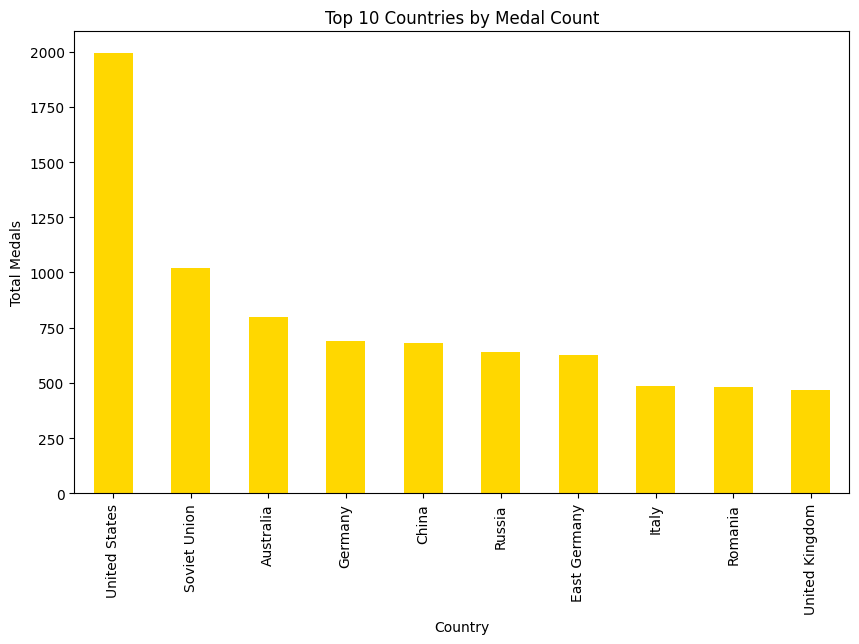

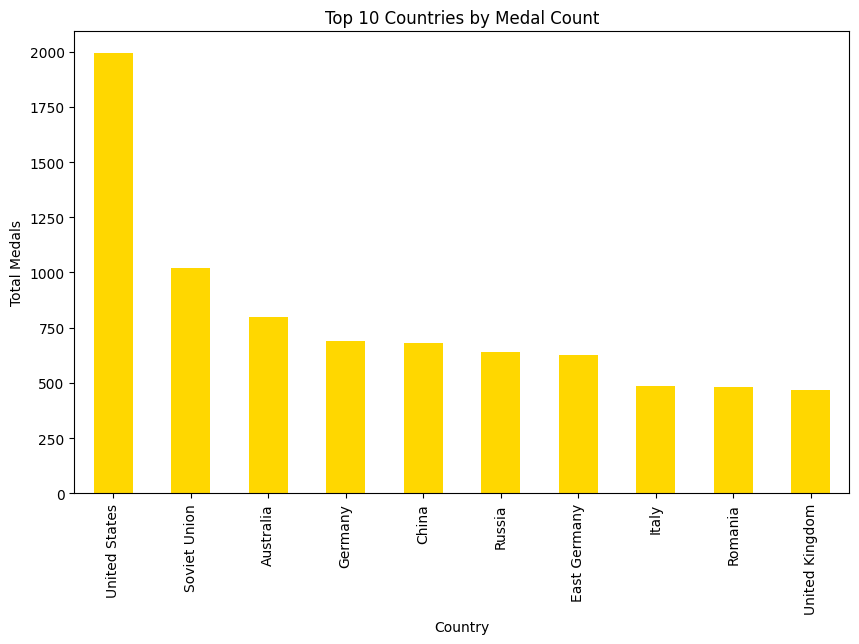

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
medals_by_country= df_cleaned.groupby('Country')['Medal'].count().sort_values(ascending=False)
 # Plotting the top 10 countries by medals
plt.figure(figsize=(10, 6))
medals_by_country.head(10).plot(kind='bar', color='gold')
plt.title("Top 10 Countries by Medal Count")
plt.xlabel("Country")
plt.ylabel("Total Medals")
plt.show()

In [24]:
 # Grouping by Year and counting the medals won
medals_over_years = df_cleaned.groupby('Year')['Medal'].count()
print(medals_by_country)

Country
United States           1992
Soviet Union            1021
Australia                798
Germany                  691
China                    679
                        ... 
Sri Lanka                  1
Togo                       1
United Arab Emirates       1
Uruguay                    1
Virgin Islands*            1
Name: Medal, Length: 127, dtype: int64


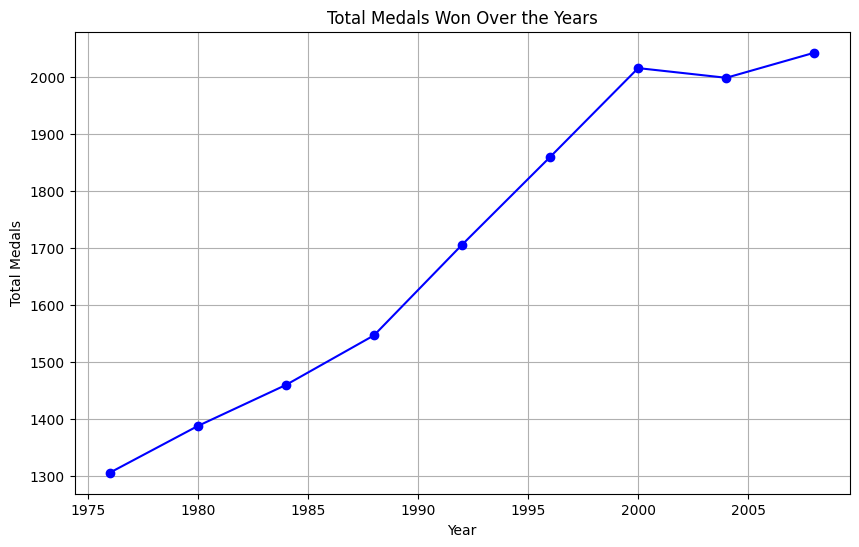

In [25]:
# Plotting the trend of medals won over the years
plt.figure(figsize=(10, 6))
plt.plot(medals_over_years.index,medals_over_years.values,marker='o', linestyle='-', color='b')
plt.title("Total Medals Won Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.grid(True)
plt.show()


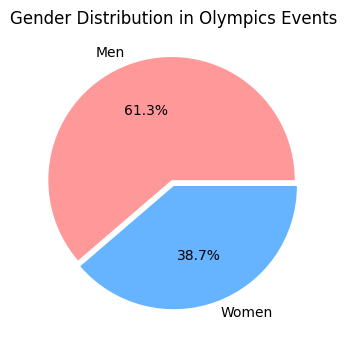

In [ ]:
 # Gender distribution in events
gender_distribution = df_cleaned['Gender'].value_counts()
# Plotting gender distribution
plt.figure(figsize=(6, 4))
gender_distribution.plot(kind='pie',
autopct='%1.1f%%',
colors=['#ff9999','#66b3ff'], explode=[0.05, 0])
plt.title("Gender Distribution in Olympics Events")
plt.ylabel('')
plt.show()
 

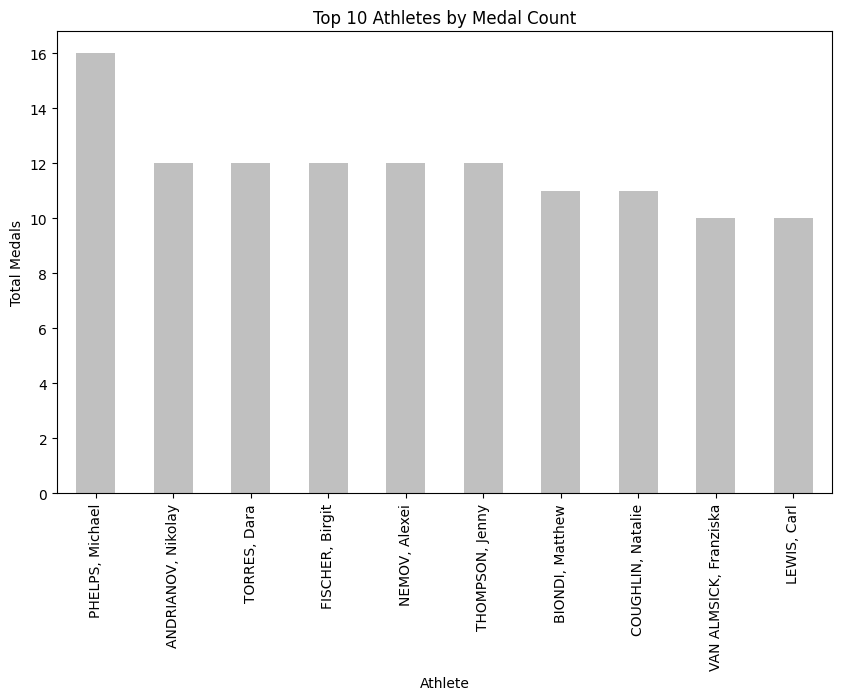

In [28]:
 # Group by Athlete and count the number of medals
athlete_medal_count=df_cleaned.groupby('Athlete')['Medal'].count().sort_values(ascending=False)
 # Plotting the top 10 athletes with most medals
plt.figure(figsize=(10, 6))
athlete_medal_count.head(10).plot(kind='bar', color='silver')
plt.title("Top 10 Athletes by Medal Count")
plt.xlabel("Athlete")
plt.ylabel("Total Medals")
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [33]:
 # Encode categorical variables using LabelEncoder
le = LabelEncoder()
df_cleaned['Country_Code']=le.fit_transform(df_cleaned['Country_Code'])
df_cleaned['Sport'] = le.fit_transform(df_cleaned['Sport'])
df_cleaned['Gender'] = le.fit_transform(df_cleaned['Gender'])
df_cleaned['Event_gender']
le.fit_transform(df_cleaned['Event_gender'])
df_cleaned['Medal'] = df_cleaned['Medal'].map({'Gold': 1,
'Silver': 1, 'Bronze': 1, np.nan: 0})

In [37]:
# Features and target
X= df_cleaned[['Country_Code','Sport','Gender', 'Event_gender']]
y = df_cleaned['Medal']

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score

# Load your data (if not already loaded)
df = pd.read_csv("olympic data.csv", encoding="ISO-8859-1")

# Create binary target column: 1 if medal won, 0 otherwise
df['Medal_Won'] = df['Medal'].notna().astype(int)

# Select relevant features
features = ['Country', 'Sport', 'Gender', 'Event_gender']
X = df[features]
y = df['Medal_Won']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), features)
    ]
)

# Model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)


Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00      3066

    accuracy                           1.00      3087
   macro avg       1.00      1.00      1.00      3087
weighted avg       1.00      1.00      1.00      3087



Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00      3066

    accuracy                           1.00      3087
   macro avg       1.00      1.00      1.00      3087
weighted avg       1.00      1.00      1.00      3087



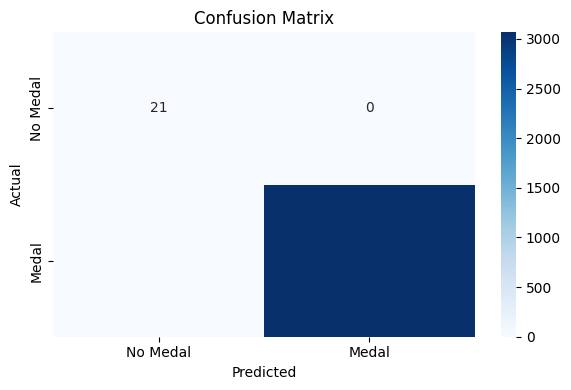

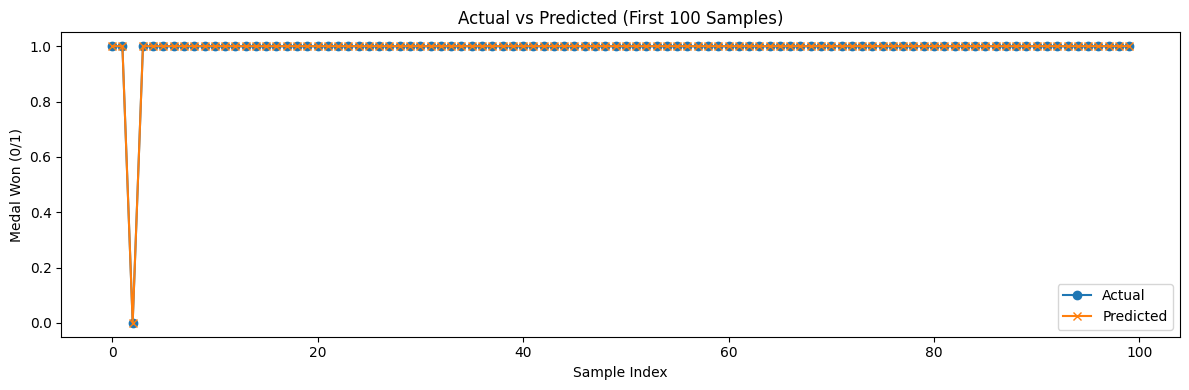

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test data
y_pred = pipeline.predict(X_test)

# Accuracy Score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Medal', 'Medal'], yticklabels=['No Medal', 'Medal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Compare Actual vs Predicted (first 100 samples for visualization)
plt.figure(figsize=(12, 4))
plt.plot(y_test[:100].values, label='Actual', marker='o')
plt.plot(y_pred[:100], label='Predicted', marker='x')
plt.title('Actual vs Predicted (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Medal Won (0/1)')
plt.legend()
plt.tight_layout()
plt.show()


Total no of unique events

In [5]:
# Load data
import pandas as pd

df = pd.read_csv("olympic data.csv", encoding="ISO-8859-1")

# Check total number of unique events
unique_events = df['Event'].nunique()
print(f"Total number of unique events held: {unique_events}")


Total number of unique events held: 293


In [8]:
print(df.columns.tolist())



['City', 'Year', 'Sport', 'Discipline', 'Event', 'Athlete', 'Gender', 'Country_Code', 'Country', 'Event_gender', 'Medal']


Top 10 Athletes with Most Medals:

Athlete
PHELPS, Michael           16
ANDRIANOV, Nikolay        12
NEMOV, Alexei             12
FISCHER, Birgit           12
TORRES, Dara              12
THOMPSON, Jenny           12
COUGHLIN, Natalie         11
BIONDI, Matthew           11
VAN ALMSICK, Franziska    10
SCHERBO, Vitaly           10
Name: count, dtype: int64


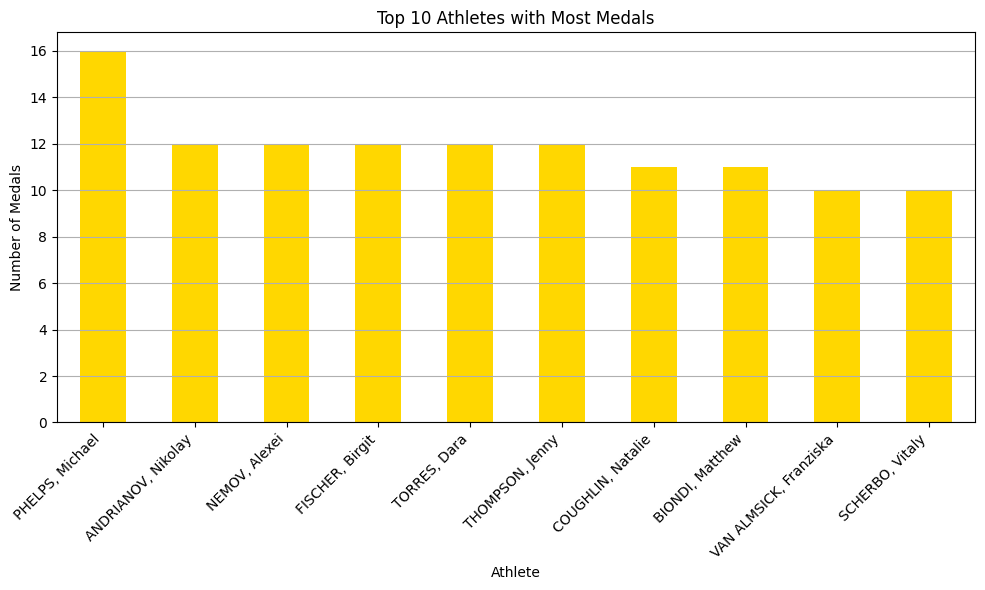

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (skip if already loaded)
# df = pd.read_csv("olympic data.csv")

# Filter only medal winners
medal_winners = df.dropna(subset=['Medal'])

# Count number of medals won by each athlete
top_athletes = medal_winners['Athlete'].value_counts().head(10)

# Print top athletes
print("Top 10 Athletes with Most Medals:\n")
print(top_athletes)

# Plot the results
plt.figure(figsize=(10, 6))
top_athletes.plot(kind='bar', color='gold')
plt.title("Top 10 Athletes with Most Medals")
plt.xlabel("Athlete")
plt.ylabel("Number of Medals")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


Gender Ratio

Medals won by Gender:
 Gender
Men      9388
Women    5928
Name: count, dtype: int64


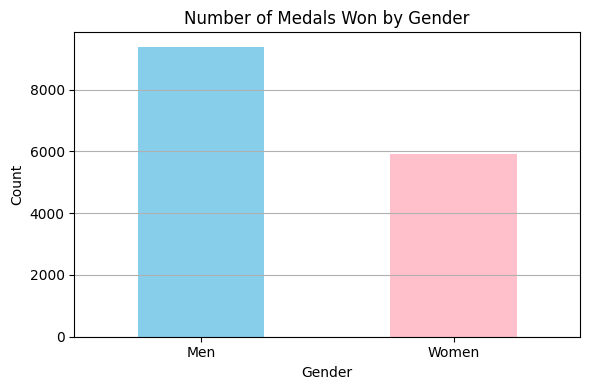

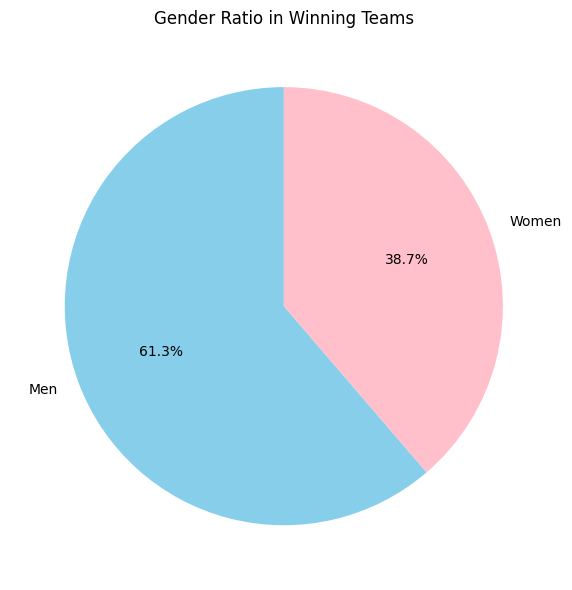

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter only medal winners
medal_winners = df.dropna(subset=['Medal'])

# Count medals by gender
gender_counts = medal_winners['Gender'].value_counts()

# Print counts
print("Medals won by Gender:\n", gender_counts)

# Bar chart
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color=['skyblue', 'pink'])
plt.title("Number of Medals Won by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# Pie chart
plt.figure(figsize=(6, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'pink'], startangle=90)
plt.title("Gender Ratio in Winning Teams")
plt.ylabel('')
plt.tight_layout()
plt.show()


                 Sport        Country  Medal_Count
43            Aquatics  United States          578
142          Athletics  United States          299
172         Basketball  United States          192
431             Hockey    Netherlands          159
531             Rowing        Romania          156
393         Gymnastics        Romania          116
338            Fencing         France          115
153           Baseball           Cuba          111
356           Football         Brazil          109
715         Volleyball         Brazil          102
412           Handball   Korea, South           96
251      Canoe / Kayak        Germany           96
333         Equestrian  United States           73
579            Sailing  United States           64
640       Table Tennis          China           61
639           Softball  United States           60
824          Wrestling  United States           57
464               Judo          Japan           57
186             Boxing         

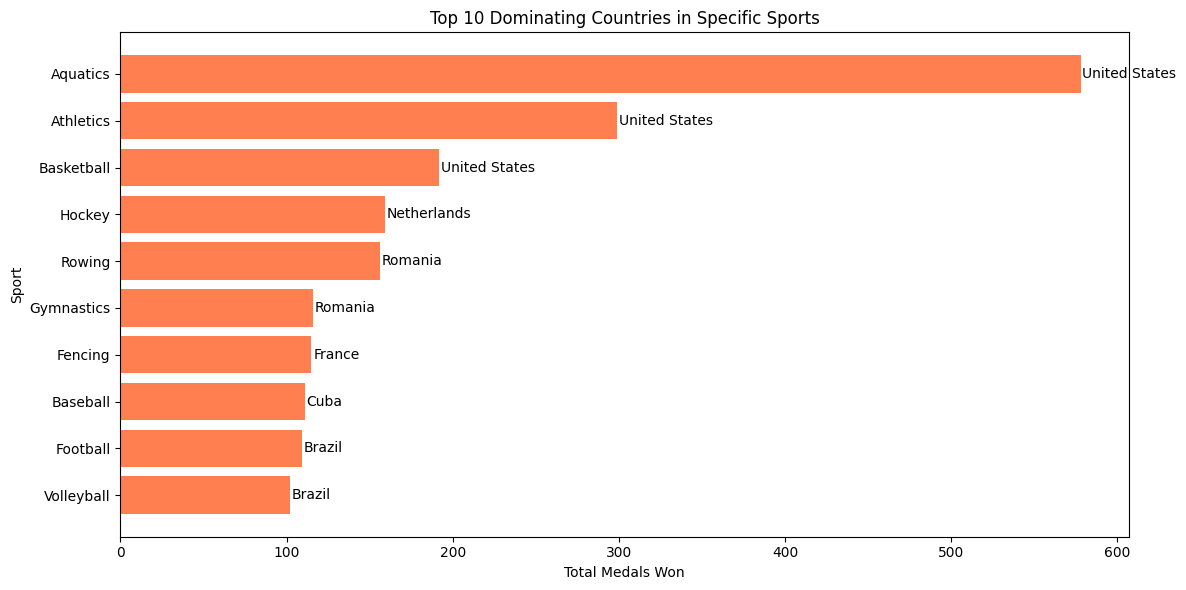

In [11]:
import pandas as pd

# Drop rows with no medal
medal_winners = df.dropna(subset=['Medal'])

# Group by Sport and Country, then count medals
sport_country_medals = medal_winners.groupby(['Sport', 'Country'])['Medal'].count().reset_index()

# Rename column for clarity
sport_country_medals.rename(columns={'Medal': 'Medal_Count'}, inplace=True)

# For each sport, get the country with the max medals
dominant_countries = sport_country_medals.sort_values('Medal_Count', ascending=False).drop_duplicates('Sport')

# Sort by medal count for better readability
dominant_countries = dominant_countries.sort_values('Medal_Count', ascending=False)

# Display top dominant countries in sports
print(dominant_countries)

# Plot the top 10 dominant countries in specific sports
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(dominant_countries['Sport'].head(10), dominant_countries['Medal_Count'].head(10), color='coral')
plt.xlabel("Total Medals Won")
plt.ylabel("Sport")
plt.title("Top 10 Dominating Countries in Specific Sports")
for i, val in enumerate(dominant_countries['Country'].head(10)):
    plt.text(dominant_countries['Medal_Count'].values[i] + 1, i, val, va='center')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Dominance of each country in every year


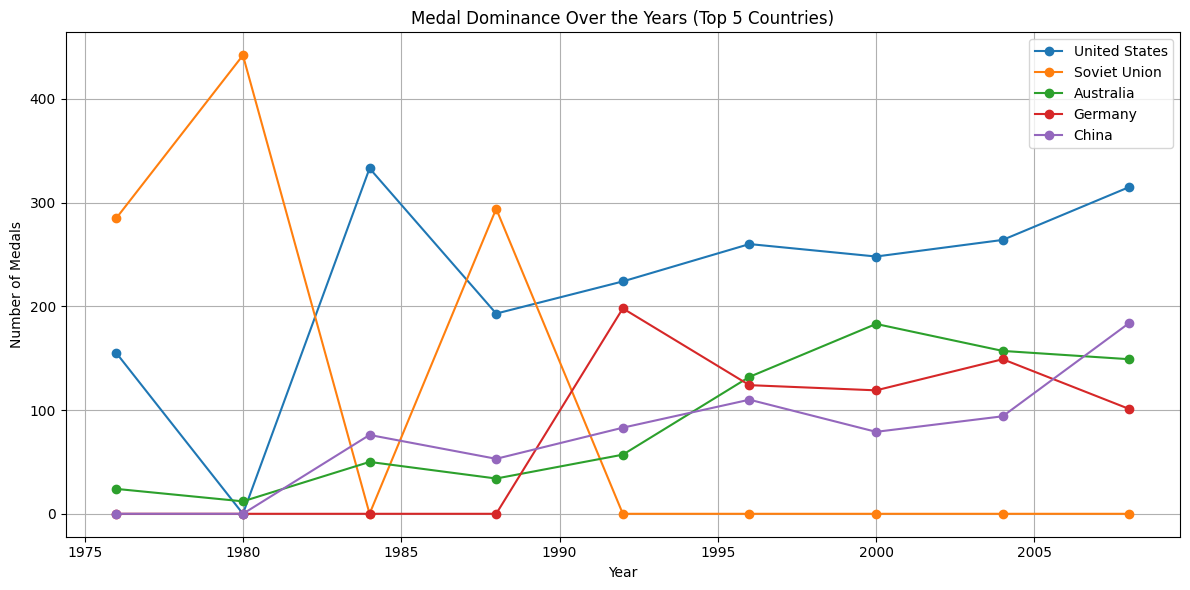

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows without medals
medal_winners = df.dropna(subset=['Medal'])

# Group by Year and Country and count medals
year_country_medals = medal_winners.groupby(['Year', 'Country'])['Medal'].count().reset_index()

# Pivot the table to get countries as columns
pivot_df = year_country_medals.pivot(index='Year', columns='Country', values='Medal').fillna(0)

# Select top 5 countries with most total medals overall
top_countries = pivot_df.sum().sort_values(ascending=False).head(5).index

# Filter pivot table to only include top countries
top_countries_df = pivot_df[top_countries]

# Plot
plt.figure(figsize=(12, 6))
for country in top_countries:
    plt.plot(top_countries_df.index, top_countries_df[country], label=country, marker='o')

plt.title("Medal Dominance Over the Years (Top 5 Countries)")
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


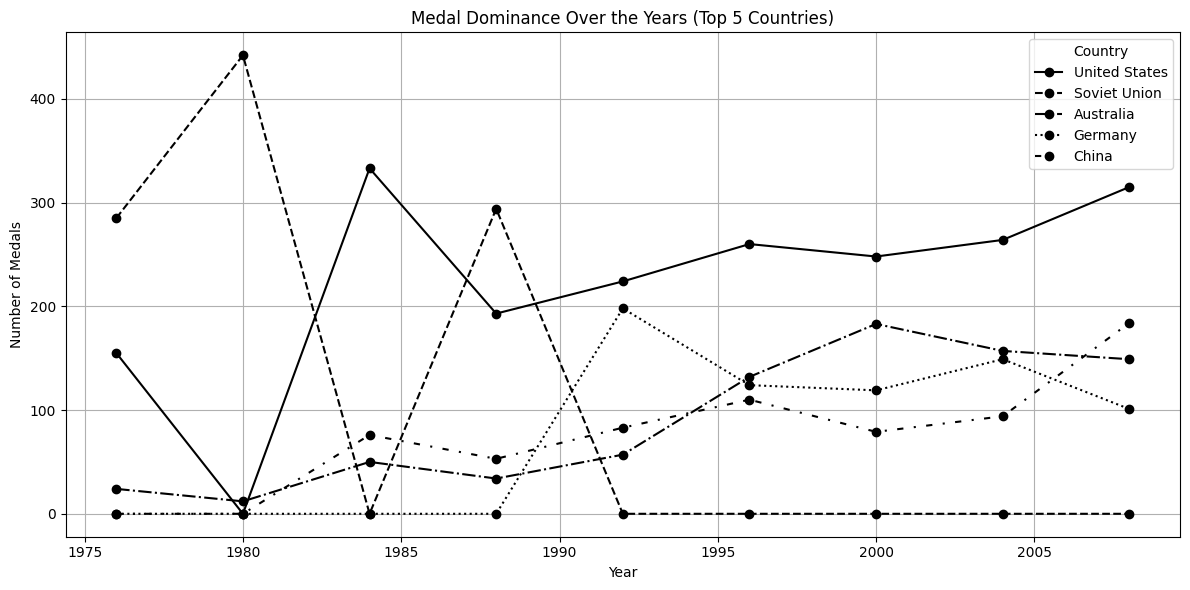

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("olympic data.csv", encoding='ISO-8859-1')  # Replace with your actual CSV file

# Filter only rows where a medal was won
medals_df = df.dropna(subset=['Medal'])

# Group by year and country, and count medals
medals_by_year_country = medals_df.groupby(['Year', 'Country'])['Medal'].count().reset_index()

# Pivot the data
pivot_df = medals_by_year_country.pivot(index='Year', columns='Country', values='Medal').fillna(0)

# Get top 5 countries by total medals
top_countries = pivot_df.sum().sort_values(ascending=False).head(5).index
pivot_df = pivot_df[top_countries]

# Define unique line styles
line_styles = ['-', '--', '-.', ':', (0, (3, 5, 1, 5))]

# Plot with line styles
plt.figure(figsize=(12, 6))
for i, country in enumerate(pivot_df.columns):
    plt.plot(
        pivot_df.index,
        pivot_df[country],
        label=country,
        linestyle=line_styles[i % len(line_styles)],
        marker='o',
        color='black'  # Use same color to focus on style
    )

plt.title("Medal Dominance Over the Years (Top 5 Countries)")
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.legend(title="Country")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#7568823092